In [29]:
from datetime import datetime
import pandas as pd
from gql import gql, Client
from gql.transport.requests import RequestsHTTPTransport
import matplotlib.pyplot as plt
import seaborn as sns

# Choose your destiny: 'mainnet' or 'testnet'
network = 'mainnet'  # or 'testnet'
endpoints = {
    'mainnet': 'https://api.poktscan.com/poktscan/api/graphql',
    'testnet': 'https://api.testnet.poktscan.com/poktscan/api/graphql'
}

api_key = str(open("../../POKT Scan.txt", "r").read())

# Set up the headers with the provided API key and content type
headers = {
    "Authorization": api_key,
    "Content-Type": "application/json"
}

# Set up the transport with the chosen GraphQL endpoint and your headers
transport = RequestsHTTPTransport(
    url=endpoints[network],
    headers=headers,
    use_json=True
)

# Create the client
client = Client(transport=transport, fetch_schema_from_transport=True)


query = gql("""
query {
  ListSummaryBetweenDates(
    input: {
      start_date: "2021-01-01",
      end_date: "2023-11-01",
      unit_time: day
    }
  ) {
    points {
        point,
        total_relays,
        total_good_txs,
    }
  }
}
""")

try:   
    # Execute the query and get the results
    response = client.execute(query)

    # Convert the result to a pandas DataFrame
    df = pd.DataFrame(response['ListSummaryBetweenDates']['points'])

    # Generate a timestamp and integrate it into the filename
    current_time = datetime.now().strftime("%Y%m%d_%H%M%S")
    
    df = df.set_index('point')
    df.index = pd.to_datetime(df.index)
    
except Exception as e:
    print(f"An error occurred: {e}")

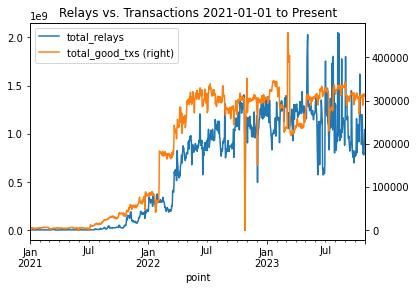

Correlation
                total_relays  total_good_txs
total_relays        1.000000        0.919621
total_good_txs      0.919621        1.000000







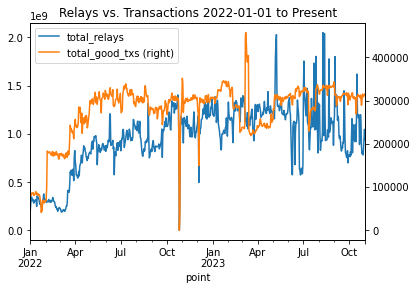

Correlation
                total_relays  total_good_txs
total_relays        1.000000        0.661931
total_good_txs      0.661931        1.000000







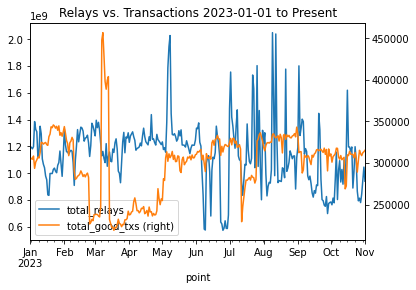

Correlation
                total_relays  total_good_txs
total_relays        1.000000       -0.146913
total_good_txs     -0.146913        1.000000







In [38]:
for start_date in ["2021-01-01", "2022-01-01", "2023-01-01"]:
    df.loc[start_date:].plot(kind='line', secondary_y="total_good_txs")
    plt.title("Relays vs. Transactions {} to Present".format(start_date))
    plt.show()
    print("Correlation")
    print(df.loc[start_date:].corr())
    for _ in range(5):
        print()